# Classifing Movie Reviews: Binary Classification

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import imdb

## Load Dataset

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\chira\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\chira\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or

In [3]:
word_index = imdb.get_word_index()

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [5]:
' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Vectorization

In [6]:
def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Model

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [11]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

## Training

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 4s 71ms/step - loss: 0.5647 - accuracy: 0.7073 - val_loss: 0.3606 - val_accuracy: 0.8685
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2975 - accuracy: 0.8989 - val_loss: 0.3361 - val_accuracy: 0.8644
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2064 - accuracy: 0.9319 - val_loss: 0.2766 - val_accuracy: 0.8890
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1612 - accuracy: 0.9471 - val_loss: 0.3479 - val_accuracy: 0.8597
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1314 - accuracy: 0.9576 - val_loss: 0.3226 - val_accuracy: 0.8777
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1036 - accuracy: 0.9687 - val_loss: 0.3153 - val_accuracy: 0.8802
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0812 - accuracy: 0.9778 - val_loss: 0.3515 - val_accuracy: 0.8775
Epoch 8/20
30

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Plotting training and validation loss

In [15]:
import matplotlib.pyplot as plt

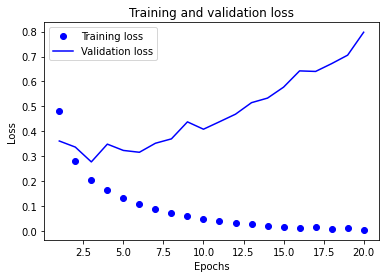

In [16]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

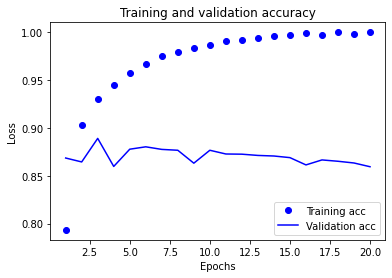

In [17]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Retraining from Scratch

In [18]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 2s 14ms/step - loss: 0.5469 - accuracy: 0.7496
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2708 - accuracy: 0.9091
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.1959 - accuracy: 0.9336
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2978 - accuracy: 0.8816


In [19]:
results

[0.29776376485824585, 0.8816400170326233]

In [20]:
model.predict(x_test)

array([[0.17534514],
       [0.999943  ],
       [0.92388844],
       ...,
       [0.15609117],
       [0.09643439],
       [0.62702906]], dtype=float32)